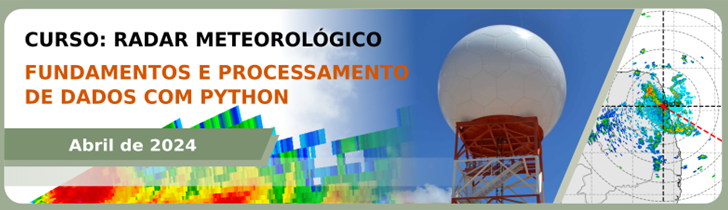

#`Tarefa 3 - 26/04/2024:` Plotando Mapa de Precipitação

- Este Colab contém as tarefas referentes ao terceiro dia do curso - 26/04/2024.

- Todas as instruções e scripts são processados diretamente na nuvem, não sendo necessário instalar ferramentas ou fazer o download dos dados localmente no seu computador. Para rodar as células de código, click no ícone de `play` no lado esquerdo superior ou digite `ctrl enter` no seu teclado.

---

**OBJETIVO:** Aplicar os conceitos aprendidos na parte prática do curso sobre produzindo mapa de precipitação.


---


**DADOS:** Usaremos os dados volumétricos (ou seja, contendo todos os Plan Position Indicator-PPIs) da refletividade horizontal (ZH), refletividade diferencial (ZDR) e fase diferencial específica (KDP) do radar de Jaraguari (MS) pertencente ao CEMADEN. No script existe um passo-a-passo explicando como baixar os dados volumétricos do radar no [site do CEMADEN](http://www2.cemaden.gov.br/mapainterativo/).

---

**PROCEDIMENTO REALIZADO NESTE SCRIPT:** Os seguintes procedimentos serão realizados nesta tarefa:
1. 1° Passo: Instalação das bibliotecas
2. 2° Passo: Importando as bibliotecas
3. 3° Passo: Baixar os dados do radar do CEMADEN
4. 4° Passo: Declarando as funções
5. **EXERCÍCIO** - Plotando Mapa de Precipitação
---

**PASSO-A-PASSO PARA REALIZAÇÃO DA ATIVIDADE**:

1.   Processar os Passos 1 e 2 do script.
2.   Baixar os arquivos volumétricos da refletividade horizontal (ZH), refletividade diferencial (ZDR) e fase diferencial específica (KDP) de um horário do radar de Jaraguari (MS) como indicado no Passo 3.
3.   Processar o Passo 4.
4.   Realizar o Exercício.
---

**Equipe:**

Palestrantes/Tutores:

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Thiago Souza Biscaro - INPE: thiago.biscaro@inpe.br / https://github.com/tsbiscaro

Colaboradores:
 - Diego Souza - INPE: diego.souza@inpe.br / https://github.com/diegormsouza
 - Flávio Augusto - UNIFEI: augustoflaviobob@gmail.com
---

# **1° Passo:** Instalando bibliotecas

Neste passo instalaremos as bibliotecas necessárias para a execução dos scripts. Basicamente, as bibliotecas terão a seguinte finalidade:

*   **cartopy:** Trabalhar com mapas geográficos
*   **pyart:** Leitura e exibição dos dados do radar



O código abaixo instala o pacote condacolab e reinicia o ambiente automaticamente.

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...


Após processar a célula de código anterior, aparecerá a mensagem abaixo. Essa mensagem é normal aparecer ao instalar o pacote condacolab, e não afeta o prosseguimento das execuções da célula. Assim, basta fechar o aviso e seguir para próxima célula do código.

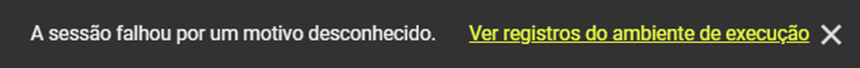

Instalação dos pacotes necessários.

In [1]:
!mamba install -q -c conda-forge cartopy==0.21.1 arm_pyart==1.16.0

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


# **2° Passo:** Importando bibliotecas

Nesta etapa importaremos todas as bibliotecas necessárias para a nossa tarefa.

In [5]:
import pyart                      # Biblioteca para trabalhar com dados de radar
import matplotlib.pyplot as plt   # Biblioteca para gerar gráficos
import geopy                      # Biblioteca para geocodificação
from geopy import distance        # Função para calculo de distância
import cartopy.crs as ccrs        # Biblioteca para trabalhar com projeções de mapas
import numpy as np                # Biblioteca para trabalhar com matrizes

# ignora avisos
import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



# **3° Passo:** Baixando os dados do radar do CEMADEN

Nesta etapa você deverá baixar o dado volumétrico de refletividade corrigida do radar de Jaraguari (MS) pertencente ao CEMADEN. Para isto, primeiramente você deverá acessar o [site](http://www2.cemaden.gov.br/mapainterativo/#) do CEMADEN e acessar a aba `Download de Dados` e em seguida clicar em `Radares`, como indicado na imagem a seguir:



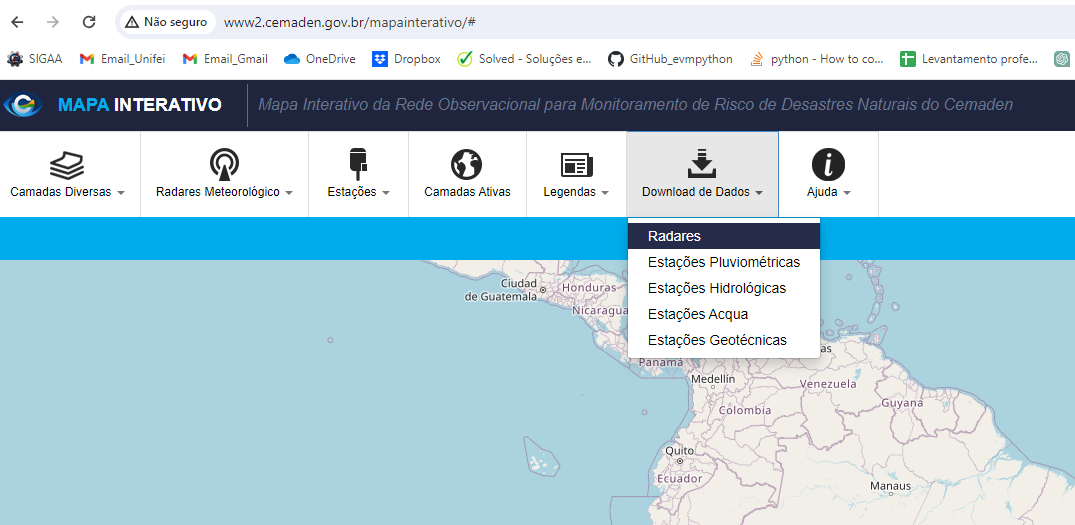

- Aparecerá uma lista com os nomes dos nove radares do CEMADEN. Em seguida você deverá acessar o link com o nome `2. jaraguari`, e clicar em `3. vol_250km_12steps.vol` e escolher o arquivo que contêm a refletividade corrigida, que esta com o final `dBZ.vol.h5`. No nosso exemplo abaixo, seria o arquivo `14. 2024021622300200dBZ.vol.h5`. Importante salientar que o CEMADEN atualmente disponíbiliza os dados de radar compreendendo o período da data atual até um mês atrás.

- Importante lembrar que não é necessário baixar especificamente o arquivo do radar com a data `2024021622300200dBZ.vol.h5`. Vocês poderão baixar o arquivo para qualquer data, porém o arquivo precisa conter a extensão `dBZ.vol.h5`.

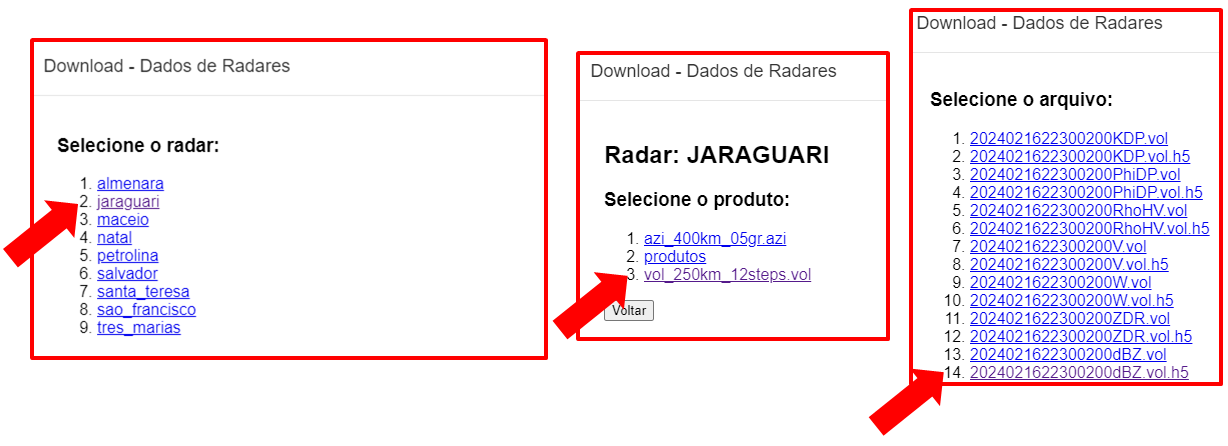

- Ao clicar no nome do arquivo, você deverá prencher o CAPTCHA e após esse procedimento o arquivo será baixado para o seu computador pessoal, no diretório de downloads.

- Após esse passo, você deverá fazer o upload do arquivo para a sua sesão do Colab. Para isto você deverá clicar na seta localizada na parte esquerda da sua tela do Colab, e em seguida escolher o arquivo que foi baixado na pasta downloads do seu computador, como indicado nas imagens a seguir:

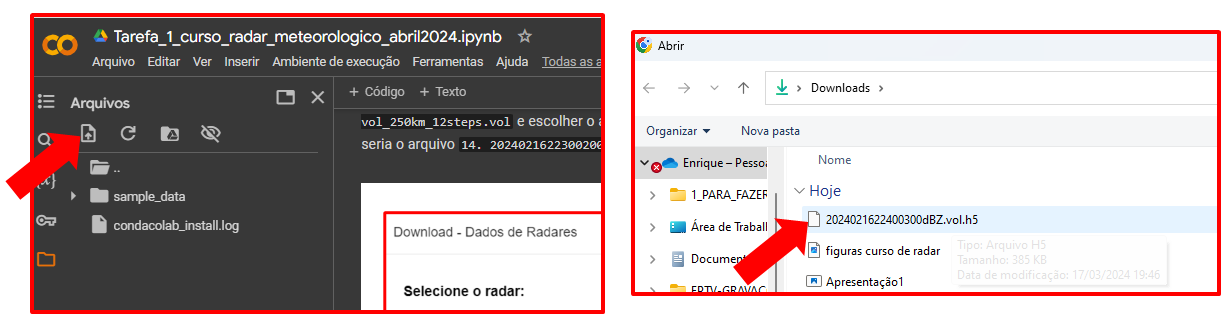

- Depois de fazer o upload do arquivo, veja que o arquivo ficará armazenado no `/content`, como indicado na imagem a seguir.

- Lembre-se que o  `/content` é a memória momentânea da sua sessão do Colab. O que significa que assim que você fechar a sua sessão do Colab, o arquivo irá ser excluído dessa sessão automaticamente.   

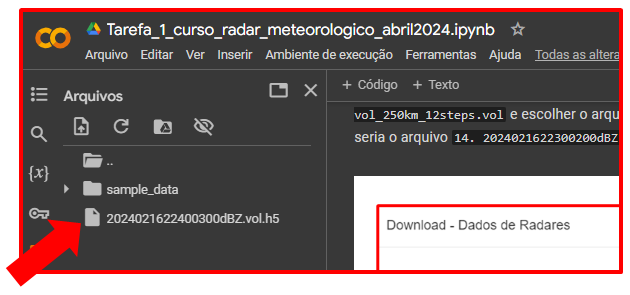

Você deverá baixar os arquivos de ZDR e KDP do mesmo dia e horário do arquivo de refletividade que foi baixado. Exemplo:
- 2024021622400300ZDR.vol.h5
- 2024021622400300KDP.vol.h5

Ou seja, ao todo nesta tarefa você precisará ter baixado os três arquivos:
- 2024021622400300dBZ.vol.h5
- 2024021622400300ZDR.vol.h5
- 2024021622400300KDP.vol.h5


- Uma explicação detalhada dos tipos dos dados dos radares do CEMADEN e o que significa a nomenclatura dos arquivos podem ser acessado nesse [tutorial](https://github.com/evmpython/curso_radar_UNIFEI_INPE_2024/blob/main/doc/Acesso_a_Dados_CEMADEN_v2024-03-19.pdf) que preparamos.

- Agora já estamos com os três arquivos volumétricos: arquivo de `refletividade corrigida (dBZ)`, arquivo de `refletividade diferencial (ZDR)` e arquivo de `fase diferencial específica (KDP)` do radar de Jaraguari (MS). Assim podemos começar a realizar o nossa Tarefa 3.

# **4° Passo:** Declarando funções

In [2]:
#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                           aneis (lista): tamanho do raio do círculo em km
                           lon_r (float): valor da longitude do centro do círculo em graus
                           lat_r (float): valor da latitude do centro do círculo em graus
                           color (str): cor do raio do círculo
                           label (str): legenda

    Parâmetros de saída:
                         latitude e longitude que delimitam os círculos de distância centrado no radar e plota os círculos

    Exemplo:
             evm_plota_aneis_em_geral([100], -45.97279, -23.600795, 'gray', label='Radar: 100 km')
    """

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label)



---


# **EXERCÍCIO:** Plotando Mapa de Precipitação


---


**ENUNCIADO:** O objetivo deste exercício é o aluno produzir o CAPPI de precipitação em 4000 m de altitude. Para isto vocês deverão utilizar a relação que combina Z-ZDR-KDP para radar Banda-S - [Ryzhkov et al (2005)](https://journals.ametsoc.org/view/journals/apme/44/4/jam2213.1.xml). Para isto vocês utilizarão como referência o `Script 09` parte 2 da aula prática. Para realizar esse exercício vocês  deverão fazer o seguinte passo-a-passo:

1.   Leitura dos arquivos do radar. Insira os nomes dos arquivos que foram baixados. Por exemplo:
- `radar = pyart.aux_io.read_odim_h5('/content/2024032118000300dBZ.vol.h55')`
- `radar_zdr = pyart.aux_io.read_odim_h5('/content/2024032118000300ZDR.vol.h5')`
- `radar_kdp = pyart.aux_io.read_odim_h5('/content/2024032118000300KDP.vol.h5')`
    - Vocês deverão inserir os nomes dos arquivos que foram baixados e feito o upload no `/content/`, e que provavelmente será de uma data e horário diferente do exemplo acima.

2.  Em `cappi_altitude = ` mude a altitude do CAPPI para 4000.

3.  Em `display.plot_grid` defina as seguintes propriedades:
    - `vmin=0.1`
    - `vmax=50`
    - `cmap='pyart_LangRainbow12'`
    - `colorbar_label='Precipitação (m/h)'`
    
4.  Em `display.plot_range_rings` plotar os aneis de 100, 200 e 250 km.

5. Mostrar a figura na tela.

6. Salvar a figura em PNG com 300 dpi de resolução e com o nome `Atividade_3_exercicio.png`.

`*OBSERVAÇÃO:` Dependendo do arquivo que foi escolhido pode ser que naquela imagem não tenha atividade convectiva. Nessa situação pode ser que a figura fique sem informação ou na cor branca.

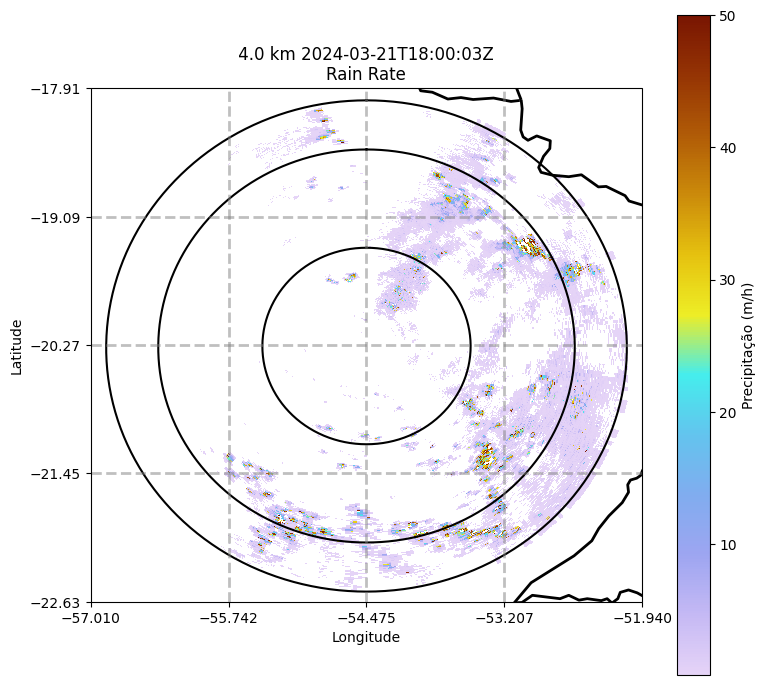

In [6]:
#========================================================================================================================#
#                                                LEITURA DADO DO RADAR
#========================================================================================================================#
# leitura da Refletividade (Z)
radar = pyart.aux_io.read_odim_h5('/content/2024032118000300dBZ.vol.h5')

# leitura da Refletividade Diferencial (ZDR)
radar_zdr = pyart.aux_io.read_odim_h5('/content/2024032118000300ZDR.vol.h5')

# leitura da Fase Diferencial Específica (KDP)
radar_kdp = pyart.aux_io.read_odim_h5('/content/2024032118000300KDP.vol.h5')

# extrai a latitude, longitude e altitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]
altitude = radar.altitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                                CALCULA PRECIPITAÇÃO
#========================================================================================================================#
# guarda os campos de cada variável
refl = radar.fields['reflectivity_horizontal']['data']
kdp = radar_kdp.fields['specific_differential_phase']['data']
zdr = radar_zdr.fields['differential_reflectivity']['data']

# chuva usando somente KDP
rkdp = 44.0 * np.ma.power(abs(kdp), 0.822)

# Marshall Palmer para Z-R
z = np.ma.power(10.0, refl/10) # transforma de dBZ para mm6/m3
r_zr = (np.ma.power(z/200, 1/1.6))

# copia o campo r_zr como matriz de saida
rain = r_zr

# agora verifica os limiares para uso com Z-ZDR-KDP
idx = np.where(r_zr <= 6)
rain[idx] = r_zr[idx] / (0.4 + 5.0 * np.ma.power(abs(zdr[idx] - 1), 1.3))

idx = np.where(r_zr > 6)
rain[idx] = rkdp[idx] / (0.4 + 3.5 * np.ma.power(abs(zdr[idx] - 1), 1.7))

idx = np.where(r_zr > 50)
rain[idx] = rkdp[idx]

#========================================================================================================================#
#                                                ADICIONA O CAMPO DE PRECIPITAÇÃO
#========================================================================================================================#
# insere o campo calculado no volume de dbz para poder calcular o cappi e retirar as informações que vem no cabeçalho do arquivo original.
# maiores informações sobre a função [.add_field_like](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.core.Radar.add_field_like.html) do Py-ART.

radar.add_field_like('reflectivity_horizontal', 'rain_rate', rain)
radar.fields['rain_rate']['units'] = 'mm/h'
radar.fields['rain_rate']['standard_name'] = 'Rain_Rate'
radar.fields['rain_rate']['long_name'] = 'Rain Rate'

#========================================================================================================================#
#                                                 GERA CAPPI
#========================================================================================================================#
# define a altitude do CAPPI
cappi_altitude = 4000
if (cappi_altitude < altitude):
    print('erro: altura do cappi menor que a altitude do radar')

# subtrai a altitude do radar
cappi_altitude = cappi_altitude - altitude

# calcula o CAPPI
cappi = pyart.map.grid_from_radars(radar, grid_shape=(1, 500, 500),
                                   grid_limits=((cappi_altitude, cappi_altitude,),
                                                (-250000., 250000.),
                                                (-250000, 250000.)),
                                   grid_origin = (lat_radar, lon_radar),
                                   gridding_algo='map_gates_to_grid',
                                   roi_func='dist_beam', min_radius=2000.0,
                                   weighting_function='Nearest')

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define o tamanho da figura
fig = plt.figure(figsize=(8, 7))

# define os eixos e projeção da figura
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# monta um objeto "display" do Py-ART
display = pyart.graph.GridMapDisplay(cappi)

# corrige o nível do cappi levando em conta a altitude do radar
# para mostrar corretamente no título da figura
display.grid.z['data'] = display.grid.z['data'] + altitude

# plota o cappi
display.plot_grid("rain_rate",
                  level=0,
                  vmin=0.1,
                  vmax=50,
                  cmap='pyart_LangRainbow12',
                  ax=ax,
                  colorbar_label='Precipitação (m/h)',
                  mask_outside=True)

# nomes dos eixos de longitude e latitude
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# plota os aneis de distância do radar
evm_plota_aneis_em_geral([100, 200, 250], lon_radar, lat_radar, 'black', label='')

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig(f'/content/Atividade_3_exercicio.png', bbox_inches='tight', dpi=300)